In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('raw iris.csv')

In [3]:
data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


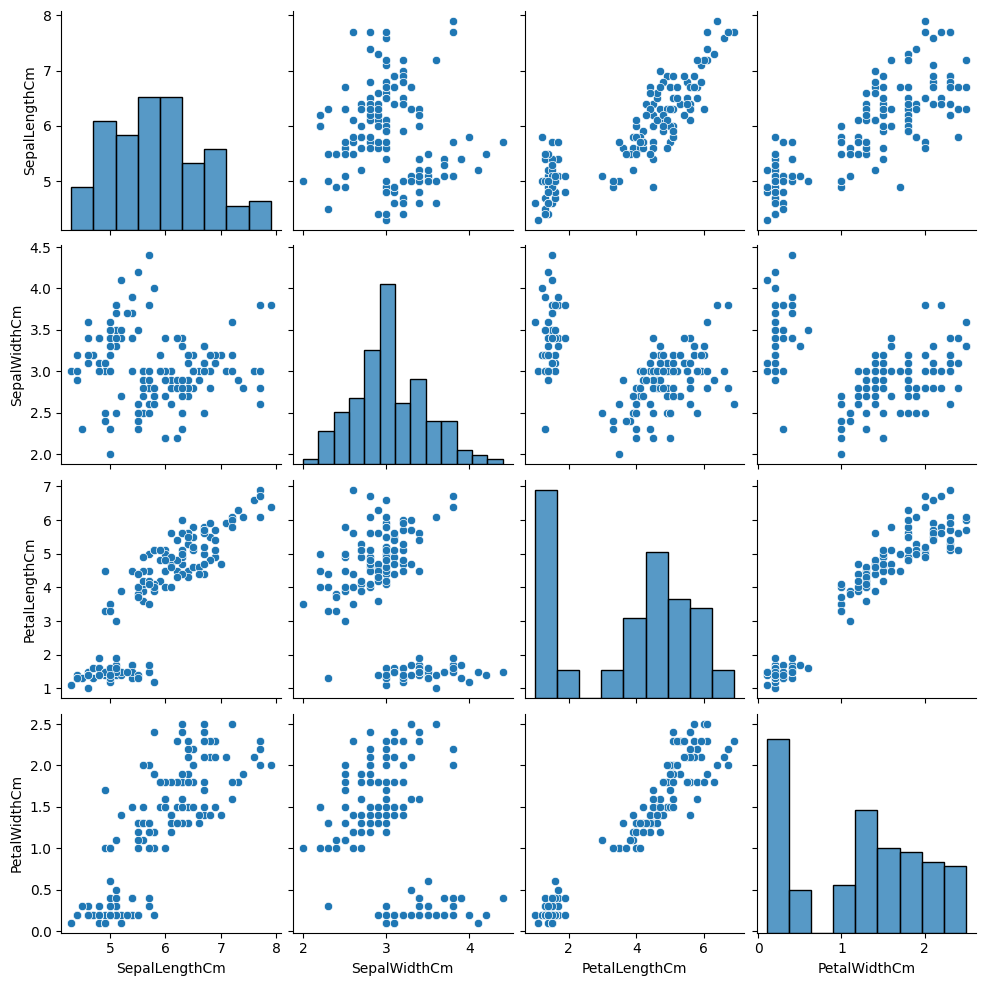

In [4]:
sns.pairplot(data=data)
plt.show()

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss=[]

for i in range(2,21):
    km=KMeans( n_clusters=i ,init='k-means++')
    km.fit(data)
    wcss.append(km.inertia_)

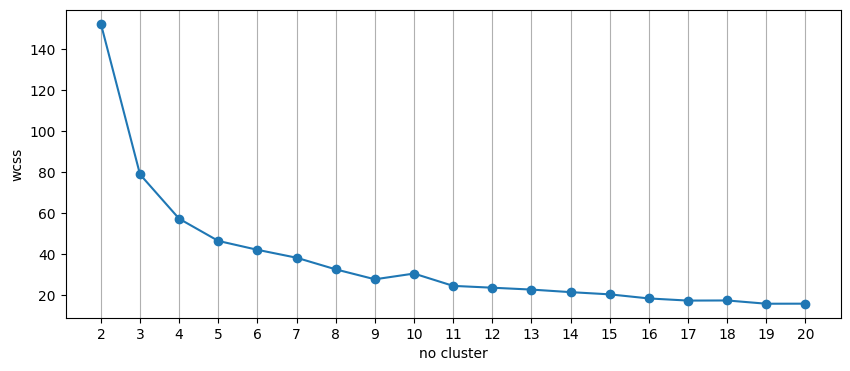

In [7]:
plt.figure(figsize=(10,4))
plt.plot( [i for i in range(2,21)],wcss,marker='o')
plt.xlabel('no cluster')
plt.ylabel('wcss')
plt.xticks([i for i in range(2,21)])
plt.grid(axis='x')
plt.show()

In [11]:
km=KMeans( n_clusters=3,init='k-means++')
data['predict']=km.fit_predict(data)

In [12]:
data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


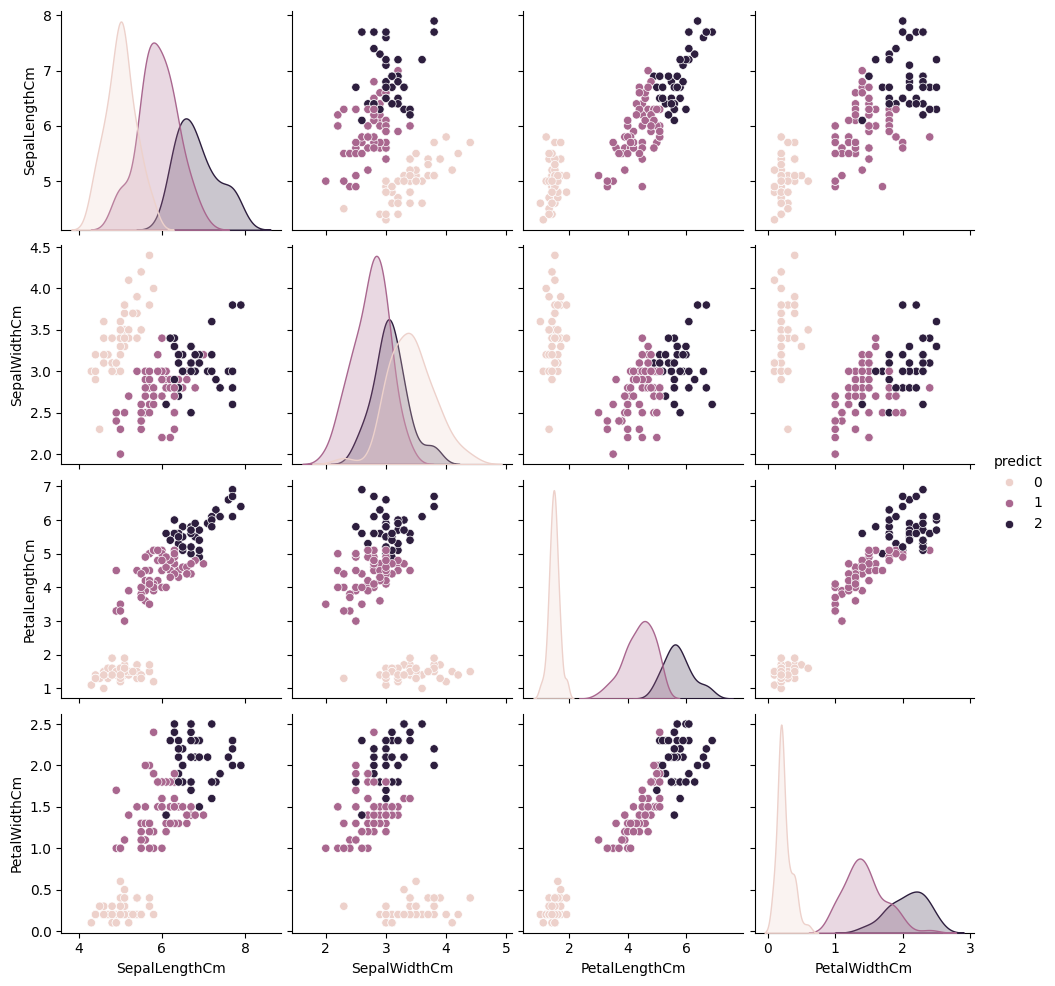

In [13]:
sns.pairplot(data=data,hue='predict')
plt.show()

In [26]:
from sklearn.metrics import silhouette_score        # if you get greater than 1 mean you have gotten right cluster
                                                    # if you get less than 1 mean you have gotten right cluster

In [19]:
ss=[]
for i in range(2,21):
    km1=KMeans(n_clusters=i,init='k-means++')
    km1.fit(data)
    ss.append(silhouette_score(data,km1.labels_))

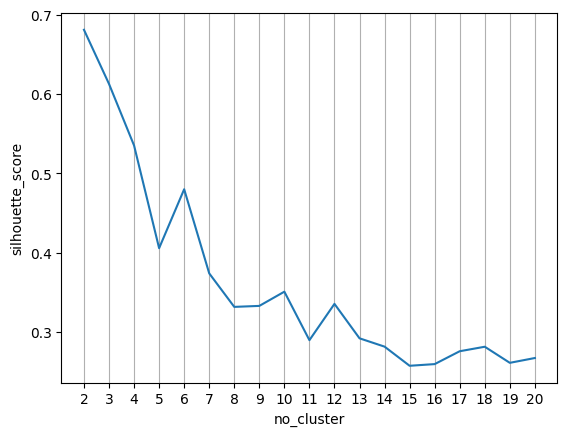

In [27]:
plt.plot([i for i in range(2,21)],ss)
plt.xlabel('no_cluster')
plt.ylabel('silhouette_score')
plt.xticks([i for i in range(2,21)]) 
plt.grid(axis='x')
plt.show()                                    # you can see here we get 2 mean right cluster, line falling  from 2